# Pymaceuticals Inc.
---

### Analysis

- This dataset contains the outcomes of ten separate cancer drug regimens and their impact on cancerous tumors in a population of 249 mice. The subsequent analysis cleans and normalizes the data, leverages statitics and data visualization to gauge the effectiveness of each drug regimen, and isolates one specific drug, Capomulin, for further consideration. From this, several observations and inferences can be made about drug regimen performance and effectiveness, three of which are included below:

1) Review of the drug testing dataset revealed duplicate timepoint observation entries for Mouse ID g989. These duplicate timepoint entries contained variable Tunmor Volume measurements. Additionaly, the termination of timepoint observations for this Mouse ID ended at different intervals. This indicates two mice were inadvertantly assigned the same Mouse ID at the beginning of the trial period; an error that was not identified at any time during the trial period. As such, we can conclude that the processes used in the mouse trial should be reviewed, corrected, and improved, particularly in the assignment of Mouse IDs and and ongoing testing audit procedures. To enusre the accurancy and integrity of future testing data it is critical these process issues be addressed.
2) Four of the ten drug regimens tested, Capomulin, Ramicane, Infubinol, and Ceftamin, showed lower average tumor volume and lower overall variance when compared against the remaining 6 drug regimens in the trial. While Infubinol and Ceftamin did have lower observed timepoint counts than five other drugs in the trial, these outcomes in average tumor volume and variance indicate Capomulin, Ramicane, Infubinol, and Ceftamin warranted further investigation for their potential effectiveness in cancer treatment.
3) Upon further investigation of this drug regimen subset, Capomulin and Ramicane outperformed other drugs in mouse lifespan, maintained lower total variance in tumor volume, and maintained a lower average tumor size. This indicates these drug regimens have the highest total potential for further study. However, Capomulin testing showed that the treatment effectively reduced tumor size through day 35 of testing, after which tumor size began to increase again among mice treated with this drug. Additionally, Capomulin showed a positive correlation between mouse weight and mouse tumor size, which indicates doseage rates for this drug may have to increase substantially with weight to be an effective complementary medicine in cancer treatment.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [8]:
# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
print(df.shape)
df.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [12]:
# Checking the number of mice.
mouse_count = df["Mouse ID"].nunique()
mouse_count

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [16]:
# Optional: Get all the data for the duplicate mouse ID.
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [20]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
average_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({
    "Average Tumor Volume": average_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Standard Deviation": std_tumor,
    "Tumor Volume SEM": sem_tumor,
})

# Display results
tumor_summary


,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Timepoint Count per Drug Regimen'}, xlabel='Observed Timepoint Count', ylabel='Drug Regimen'>

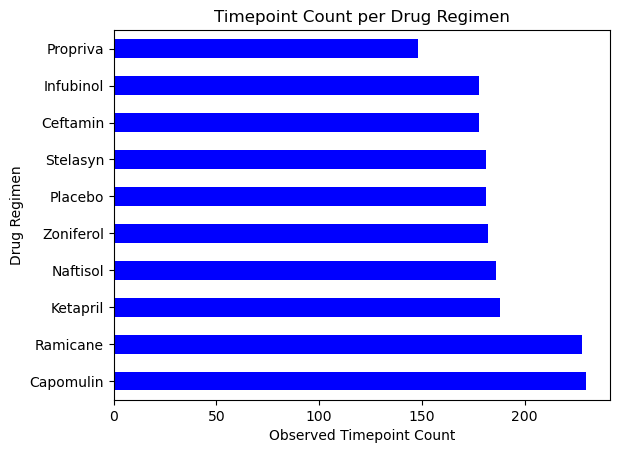

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="barh", title="Timepoint Count per Drug Regimen", xlabel="Observed Timepoint Count", color="blue") 

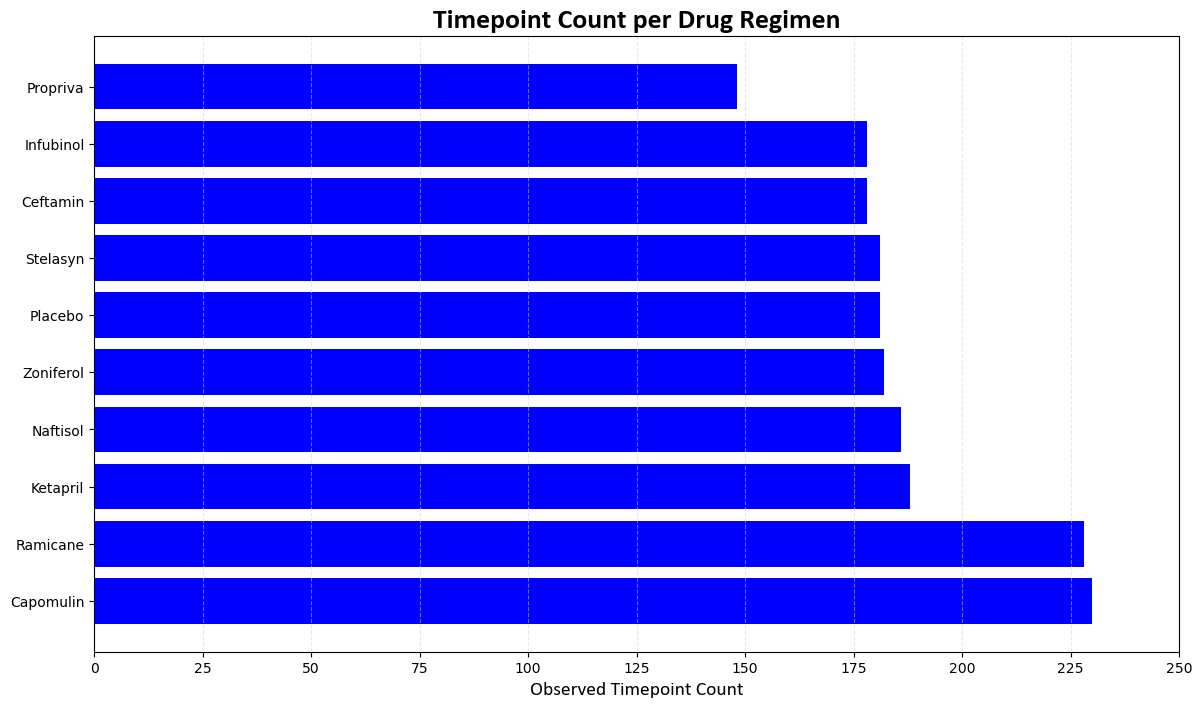

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df2.groupby("Drug Regimen").size().sort_values(ascending=False)

# Canvas Size
plt.figure(figsize=(14, 8))

# Create the Bar Chart
plt.barh(data.index, data.values, color="blue", align="center")

# Customizations
plt.xlabel("Observed Timepoint Count", fontfamily="Calibri", fontsize=14)
plt.title("Timepoint Count per Drug Regimen", fontweight="bold", fontsize=20, fontfamily="Calibri")

# Set Axis Limits
plt.xlim(0, 250)

# Add Grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.50)



# Set x axis to intervals of 25
plt.xticks(range(0, 251, 25))

# Display the graph
plt.show()

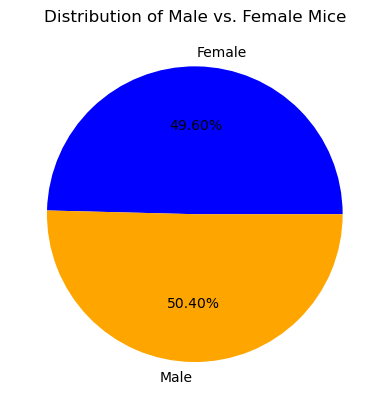

In [32]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count = df2.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart
gender_count.plot(kind="pie", autopct="%1.2f%%", title="Distribution of Male vs. Female Mice", ylabel='', colors=["Blue", "Orange"]) 

# Display the chart
plt.show()

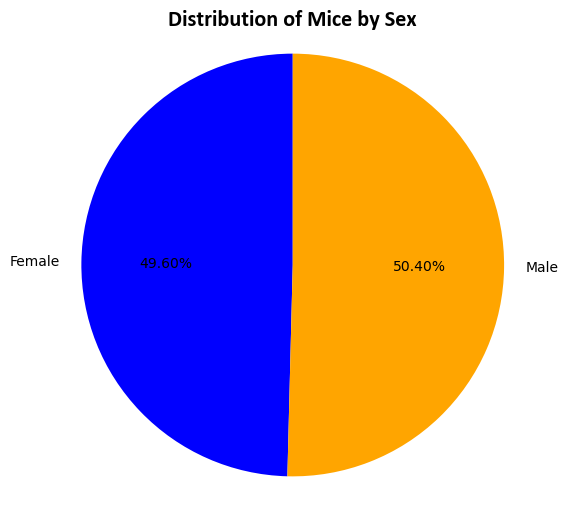

In [34]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_type = ["Female", "Male"]
gender_count = df2.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart
plt.figure(figsize=(6, 6))

# Create a basic plot
plt.pie(gender_count, labels=gender_type, colors=["Blue", "Orange"],
        autopct="%1.2f%%", shadow=False, startangle=90)

# Add Labels/Title
plt.title("Distribution of Mice by Sex", fontweight="bold", fontsize=16, fontfamily="Calibri")

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = pd.merge(max_time, df2, on=["Mouse ID", "Timepoint"], how="left")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = df3["Drug Regimen"].isin(drugs)
df3 = df3.loc[mask].reset_index(drop=True)
df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = df3["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    mouse_regimen = df3[df3["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartile1 = np.percentile(mouse_regimen, 25)
    quartile3 = np.percentile(mouse_regimen, 75)
    iqr = quartile3 - quartile1
    
    # add subset
    tumor_vols.append(mouse_regimen)
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartile1 - (1.5 * iqr)
    upper_bound = quartile3 + (1.5 * iqr)
    outliers = mouse_regimen[(mouse_regimen < lower_bound) | (mouse_regimen > upper_bound)]
    print(f"Outliers for {treatment}: {outliers.tolist()}")

Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []
Outliers for Ramicane: []
Outliers for Capomulin: []


<function matplotlib.pyplot.show(close=None, block=None)>

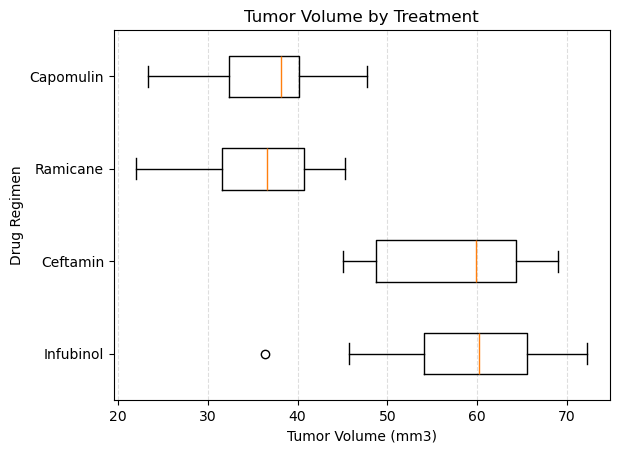

In [41]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vols, labels = treatment_list, vert=False)

# Chart Title
plt.title("Tumor Volume by Treatment")

# Label Axes
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Drug Regimen")

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Display Chart
plt.show

## Line and Scatter Plots

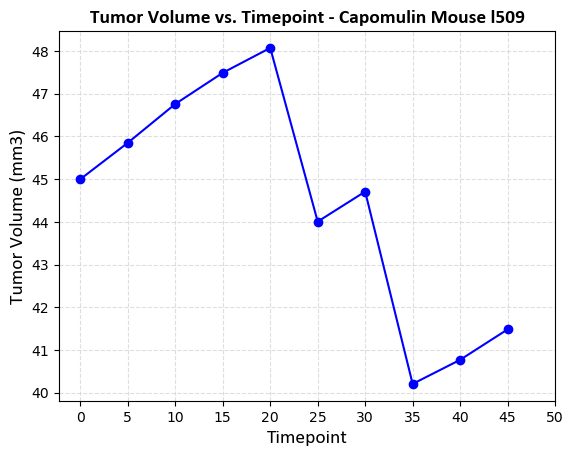

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Selected Capomulin Mouse
mouse_id = "l509"

# Filter for selected mouse data
mouse_data = df2[(df2["Mouse ID"] == mouse_id) & (df2["Drug Regimen"] == "Capomulin")]

# Sort by timepoint
mouse_data = mouse_data.sort_values("Timepoint")

# Line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color='blue', marker = "o")

# Add labels and title
plt.title(f"Tumor Volume vs. Timepoint - Capomulin Mouse {mouse_id}", fontsize=14, fontweight="bold", fontfamily="Calibri")
plt.xlabel("Timepoint", fontsize=14,fontfamily="Calibri")
plt.ylabel("Tumor Volume (mm3)", fontsize=14,fontfamily="Calibri")

# Background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Set x axis to intervals of 25
plt.xticks(range(0, 51, 5))

# Display the plot
plt.show()

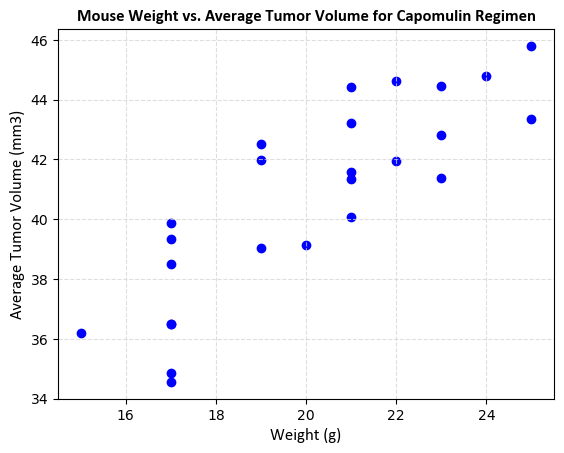

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Define Regimen
regimen = "Capomulin"

# Calculate Averages of tumor volume and mouse weight
df4 = df2.loc[df2["Drug Regimen"] == regimen]
df5 = df4.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

# Create scatter plot
plt.scatter(df5["Weight (g)"], df5["Tumor Volume (mm3)"], color="blue")

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize=12, fontweight="bold", fontfamily="Calibri")
plt.xlabel("Weight (g)", fontsize=12, fontfamily="Calibri")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12, fontfamily="Calibri")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Display the plot
plt.show()

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation Coefficient
corrs = df5[["Weight (g)", "Tumor Volume (mm3)"]].corr()
print(corrs)
print()

# Create the linear regression model
x_values = df5["Weight (g)"]
y_values = df5["Tumor Volume (mm3)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

                    Weight (g)  Tumor Volume (mm3)
Weight (g)            1.000000            0.841936
Tumor Volume (mm3)    0.841936            1.000000

y = 0.95x + 21.55


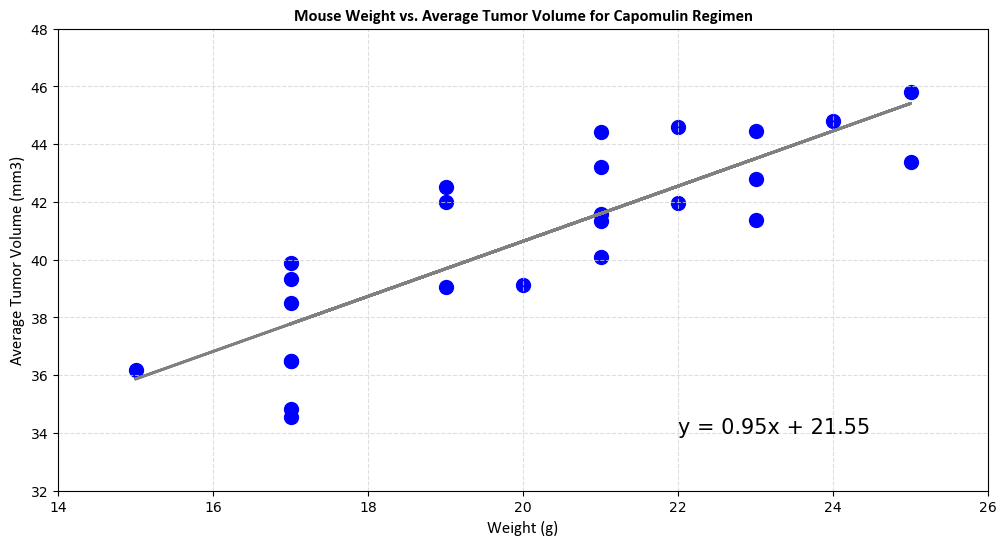

In [51]:
# Chart Regression Line
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df5["Weight (g)"], df5["Tumor Volume (mm3)"], color="blue", s=100)
plt.plot(df5["Weight (g)"], regress_values, color="grey", linewidth=2)

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize=12, fontweight="bold", fontfamily="Calibri")
plt.xlabel("Weight (g)", fontsize=12, fontfamily="Calibri")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12, fontfamily="Calibri")

# Set X/Y Limits
plt.xlim(14, 26)
plt.ylim(32, 48)


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Annotate
plt.annotate(line_eq, (22, 34), fontsize=15, color="black")

# Display the plot
plt.show()